<a href="https://colab.research.google.com/github/fullmakeralchemist/weather_prediction/blob/master/notebooks/Weather_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Istambul Weather Data
In this EDA notebook, we will delve into the intricate relationship between weather data and hydraulic engineering, exploring why meteorological information is a fundamental component of hydraulic design, planning, and management.

Hydraulic engineers are tasked with designing and managing water-related infrastructure, such as flood control systems, irrigation networks, and stormwater management systems. These engineers must grapple with the complexities of fluid dynamics, water flow, and the interaction of water with its environment. To tackle these challenges effectively, it is essential to consider the impact of weather on water systems.

## Extract and Cleaning


Depending on the type of tool you use, you need to configure your environment. In this case, I will use Google Colab since it requires the least configuration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from google.colab import files
from google.colab import drive

## Setup for the notebook
This section is necessary to run only once. After running it once, you can proceed to the next section.

`Just the second code cell this the next code to connect to drive:`


```
#Permission to use drive with your notebook
drive.mount('/content/drive')
```



In [ ]:
#First we need to upload a API Key from Kaggle
files.upload() #upload your kaggle.json file

#Just the second code cell this the next code to connect to drive:

SyntaxError: ignored

In [3]:
#Permission to use drive with your notebook
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#change directory folder first create the folfer in drive
%cd /content/drive/MyDrive/arduinoml

/content/drive/MyDrive/arduinoml


In [ ]:
!mkdir /content/drive/MyDrive/arduinoml/.kaggle #create a directory called .kaggle in the root folder
!cp kaggle.json /content/drive/MyDrive/arduinoml/kaggle/ #copy kaggle.json to this folder
!chmod 600 /content/drive/MyDrive/arduinoml/kaggle/kaggle.json #add full rights to this copied file

mkdir: cannot create directory ‘/content/drive/MyDrive/arduinoml/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!rm kaggle.json #remove the original one

rm: cannot remove 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d vonline9/weather-istanbul-data-20092019 #paste the kaggle API command

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip weather-istanbul-data-20092019.zip  #unzip the zip file

unzip:  cannot find or open weather-istanbul-data-20092019.zip, weather-istanbul-data-20092019.zip.zip or weather-istanbul-data-20092019.zip.ZIP.


In [ ]:
!rm weather-istanbul-data-20092019.zip #remove the zip file

rm: cannot remove 'weather-istanbul-data-20092019.zip': No such file or directory


## Create Dataframe


In [4]:
df = pd.read_csv('/content/drive/MyDrive/arduinoml/Istanbul Weather Data.csv',sep=",")  #read the csv file
df.head() #show the 5 first rows of the dataframe

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
0,02.09.2019,Partly cloudy,0.0,27,22,06:32:00,19:37:00,9:52:00,21:45:00,23,66,1012
1,01.09.2019,Partly cloudy,0.0,27,22,06:31:00,19:38:00,8:37:00,21:13:00,21,66,1011
2,31.08.2019,Patchy rain possible,0.5,26,22,06:30:00,19:40:00,7:21:00,20:40:00,22,63,1015
3,30.08.2019,Partly cloudy,0.0,27,22,06:29:00,19:42:00,6:4:00,20:5:00,20,64,1016
4,29.08.2019,Partly cloudy,0.0,27,23,06:27:00,19:43:00,4:47:00,19:26:00,24,61,1015



The first step is to understand the dimensions of the dataframe and the names of its columns. With this dataset, we can achieve this. The column names are essential for making specific changes to certain columns or for filtering information.
Information about the dimensions (number of rows and columns) provides us with an overview of the dataset's size, which is useful for understanding its scale and complexity.
Knowing the column names allows us to identify the type of information contained in each column and facilitates the manipulation of specific data during analysis.

In [5]:
df.shape

(3896, 12)

In [6]:
df.columns

Index(['DateTime', 'Condition', 'Rain', 'MaxTemp', 'MinTemp', 'SunRise',
       'SunSet', 'MoonRise', 'MoonSet', 'AvgWind', 'AvgHumidity',
       'AvgPressure'],
      dtype='object')

"It's also necessary to know the size of the dataframe and the data types per column. In the 'Non-Null Count' section, we can see the number of data entries within the table."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     3896 non-null   object 
 1   Condition    3896 non-null   object 
 2   Rain         3896 non-null   float64
 3   MaxTemp      3896 non-null   int64  
 4   MinTemp      3896 non-null   int64  
 5   SunRise      3896 non-null   object 
 6   SunSet       3896 non-null   object 
 7   MoonRise     3764 non-null   object 
 8   MoonSet      3765 non-null   object 
 9   AvgWind      3896 non-null   int64  
 10  AvgHumidity  3896 non-null   int64  
 11  AvgPressure  3896 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 365.4+ KB


### Missing Data Analysis
In this section, we perform an analysis of missing data within the dataset. We create a 'missing_data' variable that counts the number of missing values in each column. Understanding missing data is crucial as it helps us identify data gaps and decide on appropriate strategies for handling missing values. This analysis is vital for data quality assessment and ensuring the reliability of our results.

In [8]:
missing_data = df.isnull().sum()

missing_data

DateTime         0
Condition        0
Rain             0
MaxTemp          0
MinTemp          0
SunRise          0
SunSet           0
MoonRise       132
MoonSet        131
AvgWind          0
AvgHumidity      0
AvgPressure      0
dtype: int64

In [9]:
# See labels of the column that will help us for the Model
df.Condition.unique()

array(['Partly cloudy', 'Patchy rain possible', 'Sunny',
       'Torrential rain shower', 'Cloudy', 'Overcast',
       'Heavy rain at times', 'Patchy light rain with thunder',
       'Light rain shower', 'Moderate or heavy rain shower',
       'Moderate or heavy rain with thunder', 'Light rain',
       'Light drizzle', 'Moderate rain', 'Light sleet',
       'Moderate rain at times', 'Patchy light drizzle',
       'Thundery outbreaks possible', 'Moderate or heavy sleet',
       'Heavy rain', 'Moderate or heavy snow showers', 'Moderate snow',
       'Mist', 'Blizzard', 'Light sleet showers', 'Fog'], dtype=object)

In [10]:
# Data Cleaning and Saving Function
def data_cleaning_and_saving(df):
    # Create a copy of the dataframe
    df_copy = df.copy()

    # Get the start date (oldest date) from the 'DateTime' column
    start_date = df_copy['DateTime'].min()

    # Get the last date from the 'DateTime' column
    last_date = df_copy['DateTime'].max()

    print("Start Date:", start_date)
    print("Last Date:", last_date)

    # You can add additional data cleaning steps here if needed

# Call the data cleaning and saving function with your DataFrame
data_cleaning_and_saving(df)

Start Date: 01.01.2009
Last Date: 31.12.2018


In [11]:
# Calculate the percentage of missing data for each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Display the percentage of missing data for each column
print("Missing Data Percentage:")
print(missing_percentage)

Missing Data Percentage:
DateTime       0.00
Condition      0.00
Rain           0.00
MaxTemp        0.00
MinTemp        0.00
SunRise        0.00
SunSet         0.00
MoonRise       3.39
MoonSet        3.36
AvgWind        0.00
AvgHumidity    0.00
AvgPressure    0.00
dtype: float64


In [12]:
# Drop columns that are not necessary for the analysis
columns_to_drop = ['MoonRise', 'MoonSet', 'SunRise', 'SunSet']
df_cleaned = df.drop(columns=columns_to_drop)

# Display the cleaned dataframe without the dropped columns
print(df_cleaned)

        DateTime             Condition  Rain  MaxTemp  MinTemp  AvgWind  \
0     02.09.2019         Partly cloudy  0.00       27       22       23   
1     01.09.2019         Partly cloudy  0.00       27       22       21   
2     31.08.2019  Patchy rain possible  0.50       26       22       22   
3     30.08.2019         Partly cloudy  0.00       27       22       20   
4     29.08.2019         Partly cloudy  0.00       27       23       24   
...          ...                   ...   ...      ...      ...      ...   
3891  05.01.2009              Overcast  4.32        5        3       15   
3892  04.01.2009                  Mist  2.91        5        3        9   
3893  03.01.2009              Overcast  0.08        5        3       16   
3894  02.01.2009              Overcast  4.48        4        1       12   
3895  01.01.2009         Partly cloudy  0.23        5        2       10   

      AvgHumidity  AvgPressure  
0              66         1012  
1              66         1011  


In [13]:
# Calculate the average daily temperature from the minimum and maximum temperature
df_cleaned['AvgTemp'] = ((df_cleaned['MinTemp'] + df_cleaned['MaxTemp']) / 2).round(2)

# Display the dataframe with the added 'AvgTemp' column
df_cleaned

,DateTime,Condition,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure,AvgTemp
0,02.09.2019,Partly cloudy,0.00,27,22,23,66,1012,24.5
1,01.09.2019,Partly cloudy,0.00,27,22,21,66,1011,24.5
2,31.08.2019,Patchy rain possible,0.50,26,22,22,63,1015,24.0
3,30.08.2019,Partly cloudy,0.00,27,22,20,64,1016,24.5
4,29.08.2019,Partly cloudy,0.00,27,23,24,61,1015,25.0
...,...,...,...,...,...,...,...,...,...
3891,05.01.2009,Overcast,4.32,5,3,15,97,1015,4.0
3892,04.01.2009,Mist,2.91,5,3,9,94,1014,4.0
3893,03.01.2009,Overcast,0.08,5,3,16,94,1021,4.0
3894,02.01.2009,Overcast,4.48,4,1,12,89,1021,2.5


In [14]:
# Before starting the plotting of information, we need to format the date
# Convert the 'DateTime' column to a datetime format with the specified format
df_cleaned['DateTime'] = pd.to_datetime(df_cleaned['DateTime'], format='%d.%m.%Y')

In [15]:
# If you don't want to create a new dataframe, you can directly drop the specified columns
columns_to_drop_t = ['MaxTemp', 'MinTemp']
df_cleaned.drop(columns=columns_to_drop_t, inplace=True)

# Display the updated dataframe with the specified columns removed
df_cleaned

,DateTime,Condition,Rain,AvgWind,AvgHumidity,AvgPressure,AvgTemp
0,2019-09-02,Partly cloudy,0.00,23,66,1012,24.5
1,2019-09-01,Partly cloudy,0.00,21,66,1011,24.5
2,2019-08-31,Patchy rain possible,0.50,22,63,1015,24.0
3,2019-08-30,Partly cloudy,0.00,20,64,1016,24.5
4,2019-08-29,Partly cloudy,0.00,24,61,1015,25.0
...,...,...,...,...,...,...,...
3891,2009-01-05,Overcast,4.32,15,97,1015,4.0
3892,2009-01-04,Mist,2.91,9,94,1014,4.0
3893,2009-01-03,Overcast,0.08,16,94,1021,4.0
3894,2009-01-02,Overcast,4.48,12,89,1021,2.5


In [16]:
# Reorder the columns in the dataframe
# Define the desired column order
desired_column_order = ['DateTime', 'Condition', 'AvgTemp', 'AvgHumidity', 'AvgPressure', 'Rain', 'AvgWind']

# Reorder the columns based on the desired order
df_cleaned = df_cleaned[desired_column_order]

In [17]:
# Define a mapping of columns to their corresponding units
column_units = {
    'AvgTemp': 'AvgTemp (°C)',
    'AvgHumidity': 'AvgHumidity (%)',
    'AvgPressure': 'AvgPressure (hPa)',
    'Rain': 'Rain (mm)',
    'AvgWind': 'AvgWind (Km/s)'
    # You can add other columns and their units as needed
}

# Modify column titles with units
df_cleaned.rename(columns=column_units, inplace=True)

In [18]:
# Generate descriptive statistics for the cleaned DataFrame
df_cleaned.describe()

,AvgTemp (°C),AvgHumidity (%),AvgPressure (hPa),Rain (mm),AvgWind (Km/s)
count,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000
mean,15.929543,71.414784,1015.281314,0.946794,16.989220
std,7.142182,9.483500,6.284232,2.558308,7.950417
min,-3.500000,40.000000,992.000000,0.000000,2.000000
25%,10.000000,65.000000,1011.000000,0.000000,11.000000
50%,15.500000,71.000000,1015.000000,0.010000,16.000000
75%,22.500000,78.000000,1019.000000,0.720000,22.000000
max,30.000000,97.000000,1038.000000,42.000000,56.000000


In [19]:
# Original DataFrame Modifications

# Drop unnecessary columns
df = df.drop(columns=columns_to_drop)

# Reorder the DataFrame
# Define the desired column order
column_order = ['DateTime', 'Condition', 'MaxTemp', 'MinTemp',
                'AvgHumidity', 'AvgPressure', 'Rain', 'AvgWind']

# Reorder the columns based on the desired order
df = df[column_order]

# Print the modified DataFrame
# print(df)

In [20]:
# Modify DataFrame Columns and Units

# Define a mapping of columns to their corresponding units
column_units = {
    'MaxTemp': 'MaxTemp (°C)',
    'MinTemp': 'MinTemp (°C)',
    'AvgHumidity': 'AvgHumidity (%)',
    'AvgPressure': 'AvgPressure (hPa)',
    'Rain': 'Rain (mm)',
    'AvgWind': 'AvgWind (Km/s)'
    # You can add other columns and their units as needed
}

# Modify column titles with units
df.rename(columns=column_units, inplace=True)

# Convert the 'DateTime' column to a datetime format with the specified format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d.%m.%Y')

In [21]:
df

,DateTime,Condition,MaxTemp (°C),MinTemp (°C),AvgHumidity (%),AvgPressure (hPa),Rain (mm),AvgWind (Km/s)
0,2019-09-02,Partly cloudy,27,22,66,1012,0.00,23
1,2019-09-01,Partly cloudy,27,22,66,1011,0.00,21
2,2019-08-31,Patchy rain possible,26,22,63,1015,0.50,22
3,2019-08-30,Partly cloudy,27,22,64,1016,0.00,20
4,2019-08-29,Partly cloudy,27,23,61,1015,0.00,24
...,...,...,...,...,...,...,...,...
3891,2009-01-05,Overcast,5,3,97,1015,4.32,15
3892,2009-01-04,Mist,5,3,94,1014,2.91,9
3893,2009-01-03,Overcast,5,3,94,1021,0.08,16
3894,2009-01-02,Overcast,4,1,89,1021,4.48,12


## Time Series Analysis:

In this section, we delve into time series analysis to explore temporal patterns and trends within the dataset. Time series data often exhibits dependencies on past observations, making it crucial for tasks like forecasting and understanding how variables evolve over time. By applying time series analysis techniques, we aim to uncover insights that can help us make informed decisions, predictions, and gain a deeper understanding of the dataset's behavior over time.

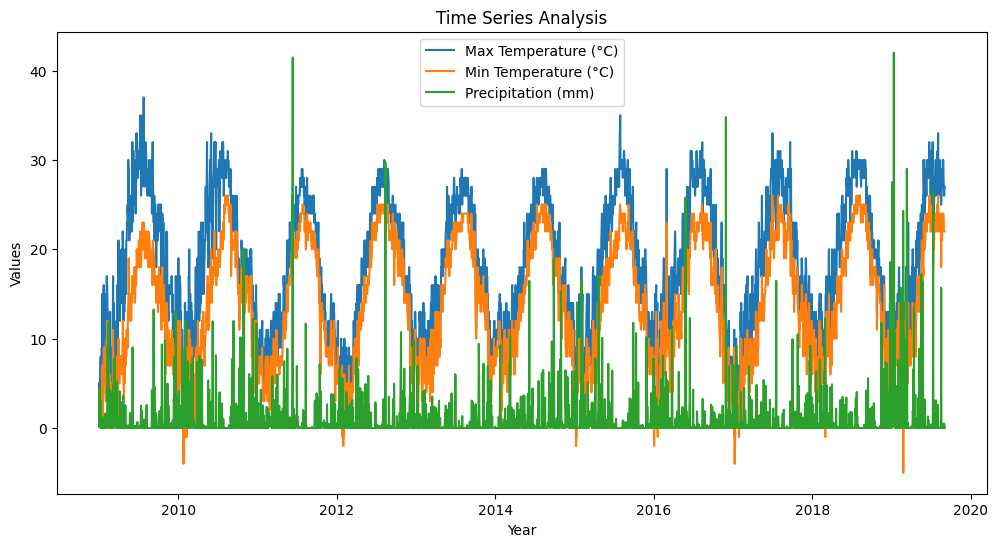

In [22]:
## Time Series Analysis

# Create a time series plot to visualize the trends of Max Temperature, Min Temperature, and Precipitation over time.
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['MaxTemp (°C)'], label='Max Temperature (°C)')
plt.plot(df['DateTime'], df['MinTemp (°C)'], label='Min Temperature (°C)')
plt.plot(df['DateTime'], df['Rain (mm)'], label='Precipitation (mm)')
plt.title('Time Series Analysis')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()


In [23]:
# Analyzing Temperature Data

# Identify the year with the highest maximum temperature
year_with_highest_max_temp = df.loc[df['MaxTemp (°C)'].idxmax()]['DateTime'].year
print("Year with the highest maximum temperature:", year_with_highest_max_temp)

# Find the date with the highest maximum temperature
date_with_highest_max_temp = df.loc[df['MaxTemp (°C)'].idxmax()]['DateTime']
print("Date with the highest maximum temperature:", date_with_highest_max_temp)

# Extract the month from the DateTime column
df['Month'] = df['DateTime'].dt.month

# Calculate the average temperature for each month
average_temp_by_month = df.groupby('Month')['MaxTemp (°C)'].mean()

# Identify the month with the historically highest average temperature
month_with_highest_avg_temp = average_temp_by_month.idxmax()
print("Month with historically highest average temperature:", month_with_highest_avg_temp)


Year with the highest maximum temperature: 2009
Date with the highest maximum temperature: 2009-07-25 00:00:00
Month with historically highest average temperature: 7


## Descriptive Analysis
The Descriptive Analysis section is the cornerstone of any comprehensive Exploratory Data Analysis (EDA). Its primary objective is to provide an in-depth understanding of the dataset's characteristics, enabling us to uncover the essential insights and patterns hidden within the data. This foundational analysis sets the stage for more advanced explorations and helps us answer fundamental questions about our data.

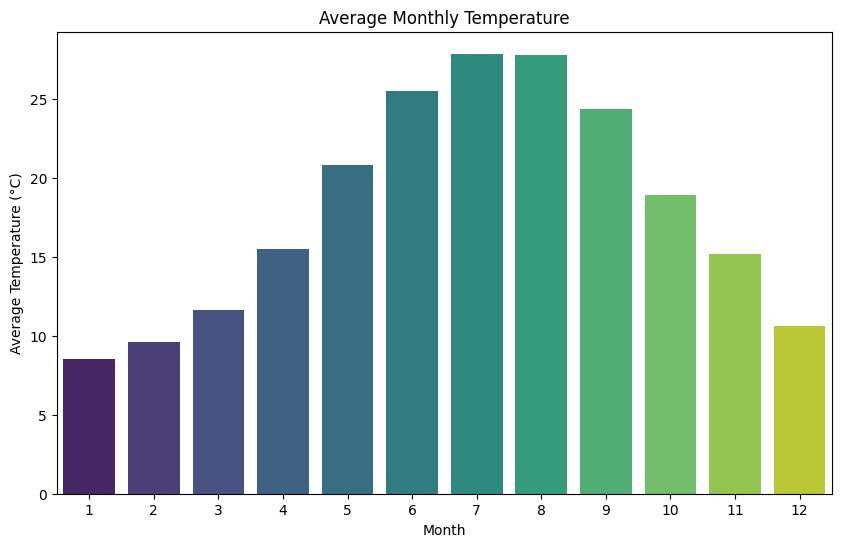

In [24]:
# Analyzing Monthly Average Temperature

# Extract the month from the DateTime column
df['Month'] = df['DateTime'].dt.month

# Calculate the average temperature for each month and reset the index
average_temp_by_month = df.groupby('Month')['MaxTemp (°C)'].mean().reset_index()

# Create a bar plot to visualize the monthly average temperature
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='MaxTemp (°C)', data=average_temp_by_month, palette='viridis')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.show()

## Rain Analysis
The Rain Analysis section is a focused exploration of one of the most critical variables in weather-related datasets: precipitation. Understanding and analyzing rainfall patterns is crucial in various fields, from agriculture to hydrology and disaster management. This analysis section is dedicated to uncovering insights related to rainfall, such as its distribution, trends, and impacts on the environment.

In [25]:
# Year with Highest Precipitation
# Identify the year with the highest recorded precipitation and its significance.
year_with_highest_max_preci = df.loc[df['Rain (mm)'].idxmax()]['DateTime'].year
print("Year with the highest Precipitation:", year_with_highest_max_preci)

# Date with Highest Precipitation
# Find the specific date with the highest recorded precipitation, providing insights into extreme rainfall events.
date_with_highest_max_preci = df.loc[df['Rain (mm)'].idxmax()]['DateTime']
print("Date with the highest maximum Precipitation:", date_with_highest_max_preci)

# Extract Month from DateTime
# Create a new 'Month' column to group data by months.
df['Month'] = df['DateTime'].dt.month

# Calculate Monthly Average Precipitation
# Compute the average precipitation for each month, helping us identify wettest and driest months.
average_preci_by_month = df.groupby('Month')['Rain (mm)'].mean()

# Month with Highest Average Precipitation
# Determine the month with historically the highest average precipitation.
month_with_highest_avg_preci = average_preci_by_month.idxmax()
print("Month with historically highest average Precipitation:", month_with_highest_avg_preci)

Year with the highest Precipitation: 2019
Date with the highest maximum Precipitation: 2019-01-11 00:00:00
Month with historically highest average Precipitation: 1


Histograms play a crucial role in hydrology, particularly in the context of rainfall, as they provide valuable insights into the distribution and frequency of rainfall events. Here are some key points highlighting the importance of histograms in hydrology for rain:

### Rainfall Distribution:

Histograms help visualize the distribution of rainfall intensity or amounts over a given period.
Understanding the distribution allows hydrologists to characterize the typical range of rainfall events and identify patterns.


### Extreme Event Analysis:

Histograms can reveal the occurrence of extreme rainfall events, such as heavy storms or prolonged periods of rainfall.
Hydrologists use this information to assess the potential impact of extreme events on flooding, erosion, and water resource management.

### Risk Assessment:

Rainfall histograms contribute to risk assessment by providing information on the likelihood of different rainfall scenarios.
This is valuable for assessing the risk of flooding, landslides, and other natural hazards associated with heavy rainfall.

### Climate Change Impact Assessment:

As climate patterns change, rainfall histograms help assess shifts in the distribution and frequency of rainfall events.
This is critical for understanding the potential impacts of climate change on water resources and infrastructure.


Text(0, 0.5, 'Frequency')

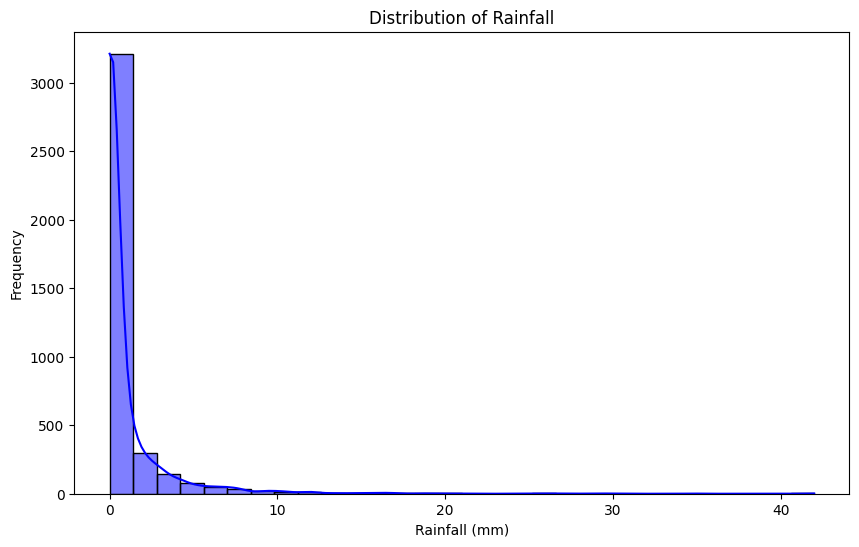

In [28]:
# Rainfall Distribution Histogram
"""
# A histogram of rain data is a graphical representation of the distribution of rainfall values in a dataset.
# It provides insights into the frequency of different ranges of rainfall amounts, allowing you to observe patterns,
# identify central tendencies, and understand the variability of rainfall.

# In the context of this code, "frequency" refers to the number of data points falling into each bin of the histogram.
# For example, if you have a bin representing rainfall values between 10 mm and 20 mm, the frequency would indicate
# how many occurrences fall within that range. The y-axis of the histogram represents this frequency.
"""
# Create a histogram of rainfall data to visualize the distribution.
plt.figure(figsize=(10, 6))
sns.histplot(df['Rain (mm)'].dropna(), bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')

In [ ]:
# Monthly or Seasonal Trends
df['month'] = df['DateTime'].dt.month
monthly_trends = df.groupby('month').mean()
monthly_trends

<ipython-input-93-96702cd096d7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_trends = df.groupby('month').mean()


,MaxTemp (°C),MinTemp (°C),AvgHumidity (%),AvgPressure (hPa),Rain (mm),AvgWind (Km/s),Month
month,,,,,,,
1,8.504399,5.425220,77.090909,1017.557185,1.366364,18.630499,1.0
2,9.614887,6.110032,78.009709,1016.702265,1.272362,18.621359,2.0
3,11.653959,7.281525,73.457478,1015.785924,1.120499,16.574780,3.0
4,15.475758,10.033333,69.881818,1014.560606,0.868667,14.281818,4.0
5,20.800587,15.032258,69.853372,1012.788856,1.007331,13.586510,5.0
6,25.509091,19.727273,66.824242,1012.130303,0.859485,14.672727,6.0
7,27.838710,22.299120,66.255132,1011.266862,0.438886,16.618768,7.0
8,27.785924,23.170088,67.938416,1012.756598,0.366804,20.093842,8.0
9,24.314570,20.364238,68.261589,1014.592715,0.920265,17.715232,9.0


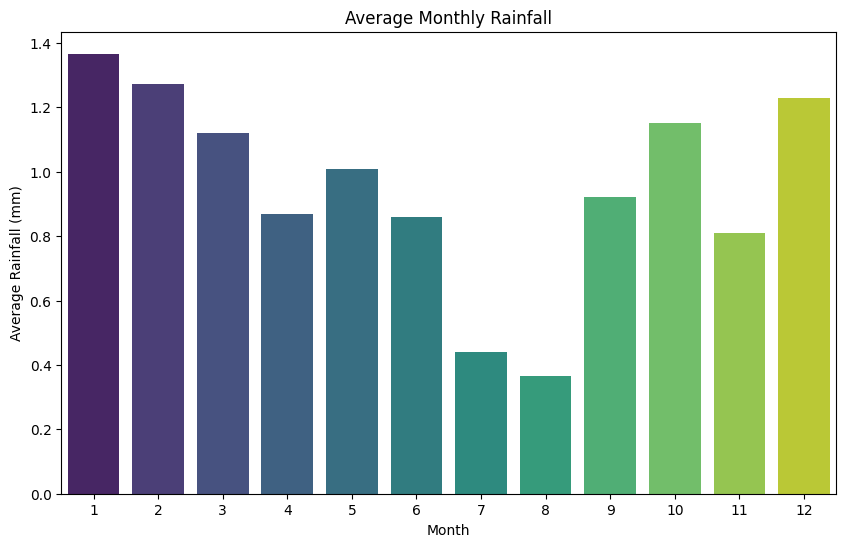

In [29]:
# Monthly Average Rainfall Analysis

# Extract the month from the DateTime column to facilitate monthly analysis.
df['Month'] = df['DateTime'].dt.month

# Calculate the average rainfall for each month and reset the index.
average_rain_by_month = df.groupby('Month')['Rain (mm)'].mean().reset_index()

# Create a bar plot to visualize the average monthly rainfall.
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Rain (mm)', data=average_rain_by_month, palette='viridis')
plt.title('Average Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.show()

In [30]:
# Transforming Precipitation Data

# Create a copy of the original DataFrame to add new columns.
df_m3 = df.copy()

# Convert precipitation depth from millimeters to meters
df_m3['Precipitation (meters)'] = df_m3['Rain (mm)'] / 1000

# Assuming you have a known area of interest in square meters (e.g., Istanbul)
area = 5343000000  # 5,343,000,000 square meters (5343 square kilometers)

# Calculate the volume of precipitation in cubic meters for the specified area.
df_m3['Volume (cubic meters)'] = area * df_m3['Precipitation (meters)']

# Optionally, convert the volume to liters (1 cubic meter = 1000 liters)
# df_m3['Volume (liters)'] = df_m3['Volume (cubic meters)'] * 1000

# Display the DataFrame with the new volume-related columns
print(df_m3[['Rain (mm)', 'Precipitation (meters)', 'Volume (cubic meters)']])

      Rain (mm)  Precipitation (meters)  Volume (cubic meters)
0          0.00                 0.00000                    0.0
1          0.00                 0.00000                    0.0
2          0.50                 0.00050              2671500.0
3          0.00                 0.00000                    0.0
4          0.00                 0.00000                    0.0
...         ...                     ...                    ...
3891       4.32                 0.00432             23081760.0
3892       2.91                 0.00291             15548130.0
3893       0.08                 0.00008               427440.0
3894       4.48                 0.00448             23936640.0
3895       0.23                 0.00023              1228890.0

[3896 rows x 3 columns]


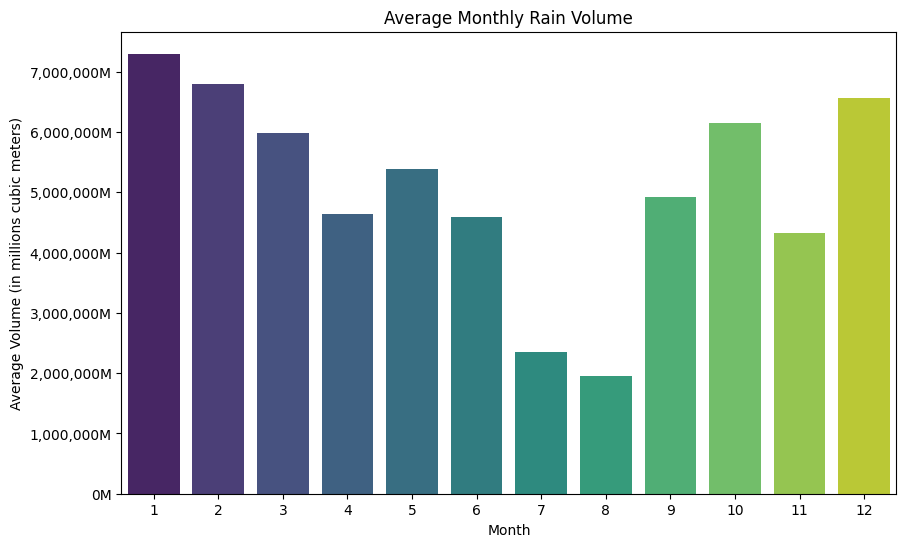

In [31]:
# Monthly Average Rain Volume Analysis

# Extract the month from the DateTime column to facilitate monthly analysis.
df_m3['Month'] = df_m3['DateTime'].dt.month

# Calculate the average rain volume for each month and reset the index.
average_rain_by_month = df_m3.groupby('Month')['Volume (cubic meters)'].mean().reset_index()

# Create a bar plot to visualize the average monthly rain volume.
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Volume (cubic meters)', data=average_rain_by_month, palette='viridis')

# Format y-axis ticks to display values in millions
formatter = mticker.StrMethodFormatter('{x:,.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Average Monthly Rain Volume')
plt.xlabel('Month')
plt.ylabel('Average Volume (in millions cubic meters)')
plt.show()

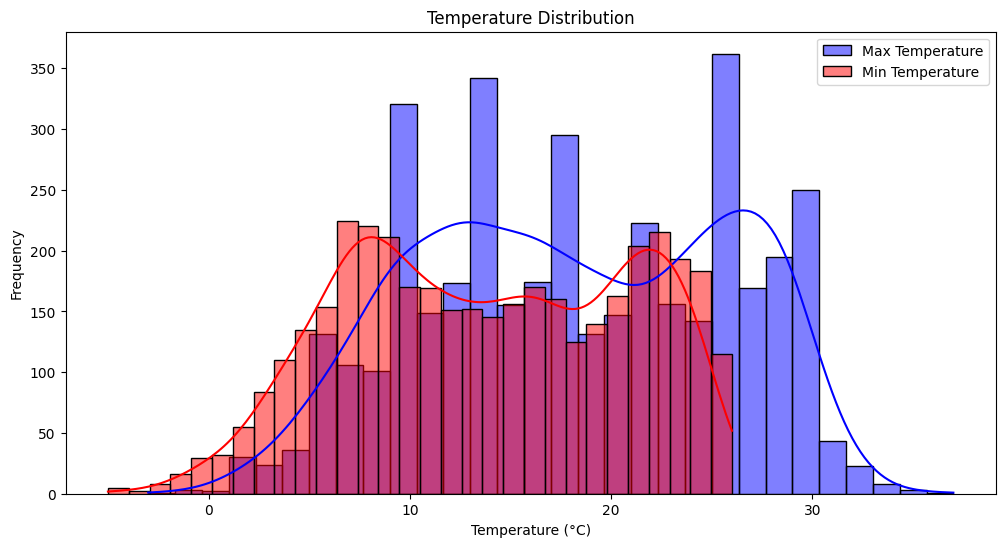

In [32]:
# Temperature Analysis

# Create a histogram to visualize the distribution of maximum and minimum temperatures.
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='MaxTemp (°C)', bins=30, kde=True, color='blue', label='Max Temperature')
sns.histplot(data=df, x='MinTemp (°C)', bins=30, kde=True, color='red', label='Min Temperature')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Monthly Storm Counts by Rain Category:

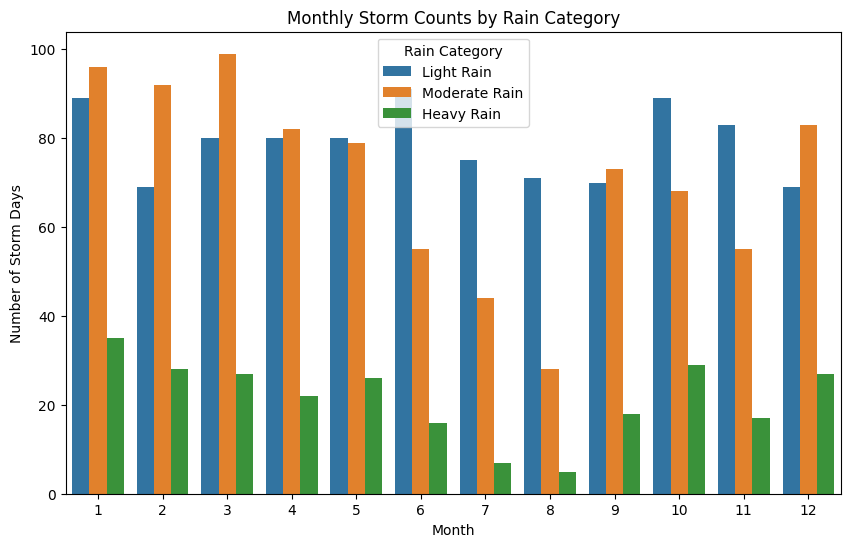

In [35]:
# Define thresholds for different levels of rainfall intensity
moderate_threshold = 0.5
heavy_threshold = 4.0

# Create columns for different storm categories
df['Light Rain'] = (df['Rain (mm)'] > 0) & (df['Rain (mm)'] <= moderate_threshold)
df['Moderate Rain'] = (df['Rain (mm)'] > moderate_threshold) & (df['Rain (mm)'] <= heavy_threshold)
df['Heavy Rain'] = (df['Rain (mm)'] > heavy_threshold)

# Plot the count of storm days for each category per month
storm_counts = df.groupby('Month')[['Light Rain', 'Moderate Rain', 'Heavy Rain']].sum().reset_index()

# Melt the DataFrame for better visualization
storm_counts_melted = pd.melt(storm_counts, id_vars='Month', var_name='Rain Category', value_name='Count')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Count', hue='Rain Category', data=storm_counts_melted)
plt.title('Monthly Storm Counts by Rain Category')
plt.xlabel('Month')
plt.ylabel('Number of Storm Days')
plt.show()

### Storm Duration Analysis:

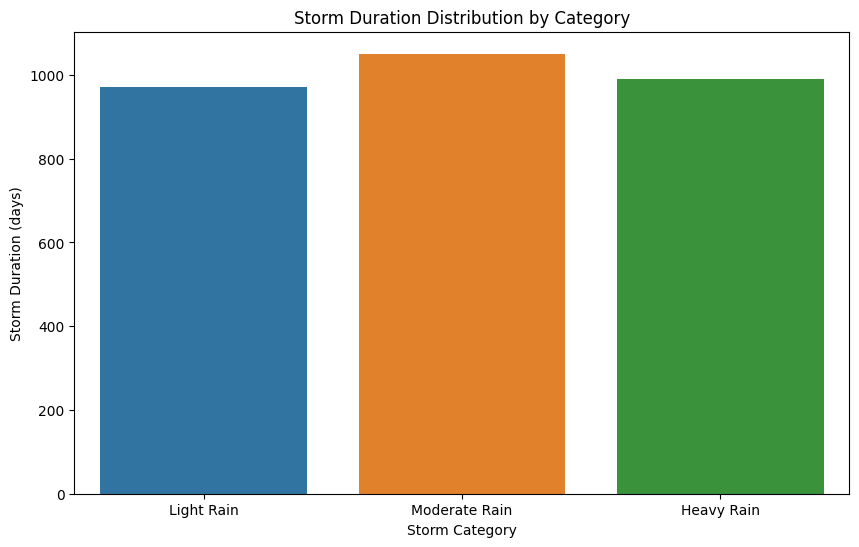

In [40]:
# Categorizing Storms and Visualizing Storm Durations

# Define thresholds for different levels of rainfall intensity
moderate_threshold = 0.5  # mm
heavy_threshold = 4.0  # mm

# Create columns for different storm categories based on rainfall intensity
df['Light Rain'] = (df['Rain (mm)'] > 0) & (df['Rain (mm)'] <= moderate_threshold)
df['Moderate Rain'] = (df['Rain (mm)'] > moderate_threshold) & (df['Rain (mm)'] <= heavy_threshold)
df['Heavy Rain'] = (df['Rain (mm)'] > heavy_threshold)

# Create a 'Storm Category' column to represent the storm category on each day
# Using np.select to categorize each day as 'Heavy Rain', 'Moderate Rain', 'Light Rain', or 'No Storm'
df['Storm Category'] = np.select(
    [df['Heavy Rain'], df['Moderate Rain'], df['Light Rain']],
    ['Heavy Rain', 'Moderate Rain', 'Light Rain'],
    default='No Storm'
)

# Create a 'Storm Duration' column to represent the consecutive days of storms
df['Storm Duration'] = (df['Storm Category'] != df['Storm Category'].shift()).cumsum() * (df['Storm Category'] != 'No Storm')

# Visualize the distribution of storm durations by category
# Using a bar plot to show the duration of each storm category, excluding 'No Storm' days.
plt.figure(figsize=(10, 6))
sns.barplot(x='Storm Category', y='Storm Duration', data=df[df['Storm Category'] != 'No Storm'], errorbar=None)
plt.title('Storm Duration Distribution by Category')
plt.xlabel('Storm Category')
plt.ylabel('Storm Duration (days)')
plt.show()

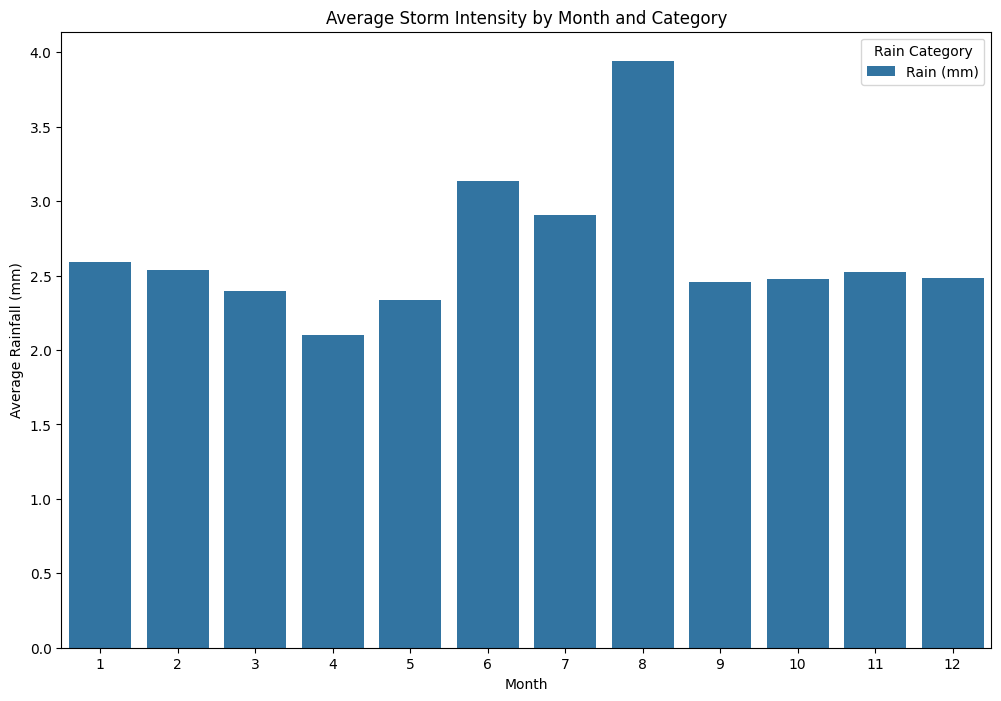

In [42]:
# Calculating Average Storm Intensity and Visualizing

# Create columns for different storm categories based on rainfall intensity
df['Light Rain'] = (df['Rain (mm)'] > 0) & (df['Rain (mm)'] <= moderate_threshold)
df['Moderate Rain'] = (df['Rain (mm)'] > moderate_threshold) & (df['Rain (mm)'] <= heavy_threshold)
df['Heavy Rain'] = (df['Rain (mm)'] > heavy_threshold)

# Calculate the average storm intensity for each month and category
avg_storm_intensity = df.groupby(['Month', 'Light Rain', 'Moderate Rain', 'Heavy Rain'])['Rain (mm)'].mean().reset_index()

# Melt the DataFrame for better visualization
avg_storm_intensity_melted = pd.melt(avg_storm_intensity, id_vars=['Month', 'Light Rain', 'Moderate Rain', 'Heavy Rain'],
                                      var_name='Rain Category', value_name='Average Rainfall')

# Visualize the average storm intensity by month and category
# Using a bar plot to display the average rainfall for each storm category per month.
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Average Rainfall', hue='Rain Category', data=avg_storm_intensity_melted, errorbar=None)
plt.title('Average Storm Intensity by Month and Category')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.show()


## Wind analysis


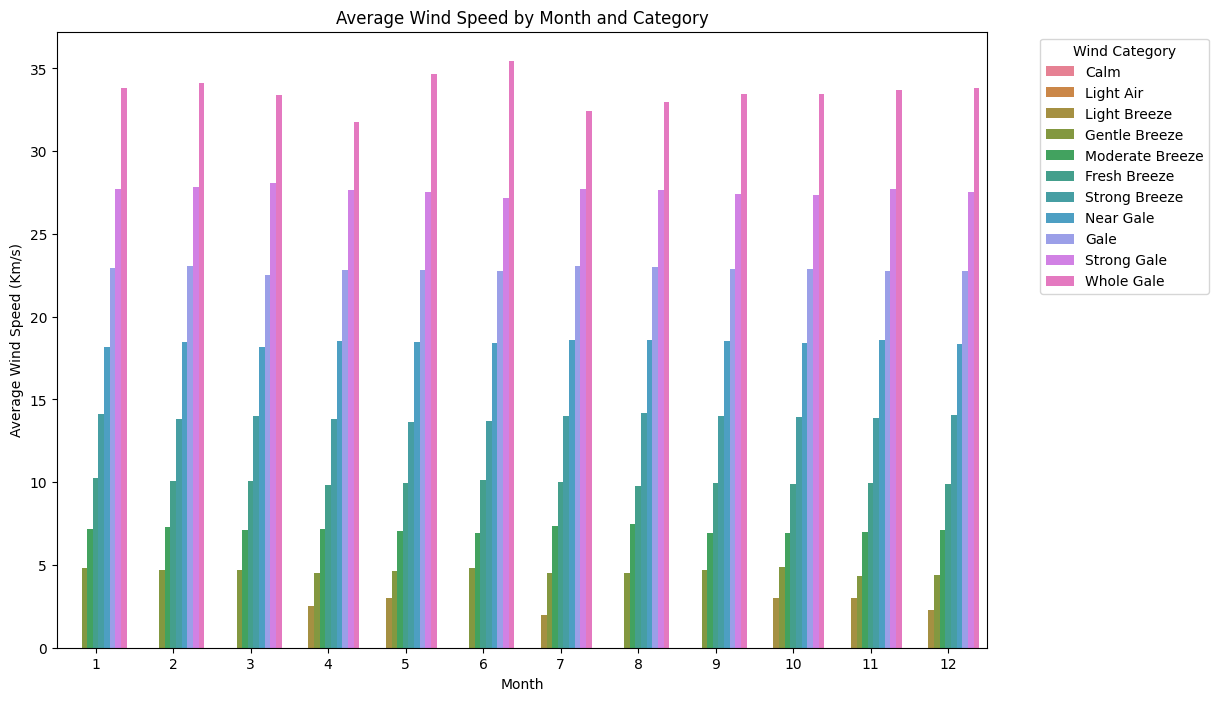

In [43]:
# Categorizing Wind Speed and Visualizing

# Define wind speed thresholds in Km/s based on the provided descriptions
wind_speed_thresholds = [0, 0.44704, 1.34112, 3.13248, 5.0292, 8.04672, 11.26528, 16.09344, 20.1168, 25.41168, 30.57888, 38.62464]

# Create wind speed categories based on thresholds
wind_categories = ['Calm', 'Light Air', 'Light Breeze', 'Gentle Breeze', 'Moderate Breeze', 'Fresh Breeze',
                   'Strong Breeze', 'Near Gale', 'Gale', 'Strong Gale', 'Whole Gale']

# Create a new column for the wind category using pd.cut
df['Wind Category'] = pd.cut(df['AvgWind (Km/s)'], bins=wind_speed_thresholds, labels=wind_categories, right=False)

# Calculate the average wind speed for each month and category
avg_wind_speed = df.groupby(['Month', 'Wind Category'])['AvgWind (Km/s)'].mean().reset_index()

# Set a custom color palette for each wind category
wind_palette = sns.color_palette("husl", n_colors=len(wind_categories))

# Visualize the average wind speed by month and category
# Using a bar plot with a custom color palette to show the average wind speed for each category per month.
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='AvgWind (Km/s)', hue='Wind Category', data=avg_wind_speed, palette=wind_palette)
plt.title('Average Wind Speed by Month and Category')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (Km/s)')
plt.legend(title='Wind Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Correlation
One essential aspect of EDA is understanding the correlation between different variables in your dataset.

In the previous sections, we have explored various aspects of the weather dataset, including temperature, rainfall, and wind speed. However, we have not yet discussed the importance of correlation. Understanding the relationships and dependencies between variables is fundamental to building an effective machine learning model.

Let's begin our correlation analysis to pave the way for building an accurate machine learning model for weather prediction.


In [44]:
# Correlation Analysis

# Calculate the correlation matrix to assess the relationships between numerical variables.
correlation_matrix = df.corr()

# Display the correlation matrix.
correlation_matrix


<ipython-input-44-2e24cf820206>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,MaxTemp (°C),MinTemp (°C),AvgHumidity (%),AvgPressure (hPa),Rain (mm),AvgWind (Km/s),Month,Light Rain,Moderate Rain,Heavy Rain,Storm Duration
MaxTemp (°C),1.000000,0.946626,-0.469191,-0.436150,-0.144952,-0.140458,0.319418,-0.039054,-0.188182,-0.121526,-0.243095
MinTemp (°C),0.946626,1.000000,-0.371696,-0.399119,-0.123754,-0.047940,0.394296,-0.010034,-0.152552,-0.113458,-0.219001
AvgHumidity (%),-0.469191,-0.371696,1.000000,-0.013038,0.278792,0.201916,-0.125584,0.035265,0.252742,0.245626,0.413342
AvgPressure (hPa),-0.436150,-0.399119,-0.013038,1.000000,-0.153274,0.076457,0.094289,0.092684,-0.101430,-0.133020,-0.085372
Rain (mm),-0.144952,-0.123754,0.278792,-0.153274,1.000000,0.155156,-0.037638,-0.175797,0.145901,0.764361,0.249017
AvgWind (Km/s),-0.140458,-0.047940,0.201916,0.076457,0.155156,1.000000,0.048955,0.042184,0.110765,0.109367,0.106230
Month,0.319418,0.394296,-0.125584,0.094289,-0.037638,0.048955,1.000000,0.005465,-0.066514,-0.032387,-0.082894
Light Rain,-0.039054,-0.010034,0.035265,0.092684,-0.175797,0.042184,0.005465,1.000000,-0.300043,-0.150491,0.382742
Moderate Rain,-0.188182,-0.152552,0.252742,-0.101430,0.145901,0.110765,-0.066514,-0.300043,1.000000,-0.140807,0.422517
Heavy Rain,-0.121526,-0.113458,0.245626,-0.133020,0.764361,0.109367,-0.032387,-0.150491,-0.140807,1.000000,0.187375


<ipython-input-34-8a45d9b3ba4b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


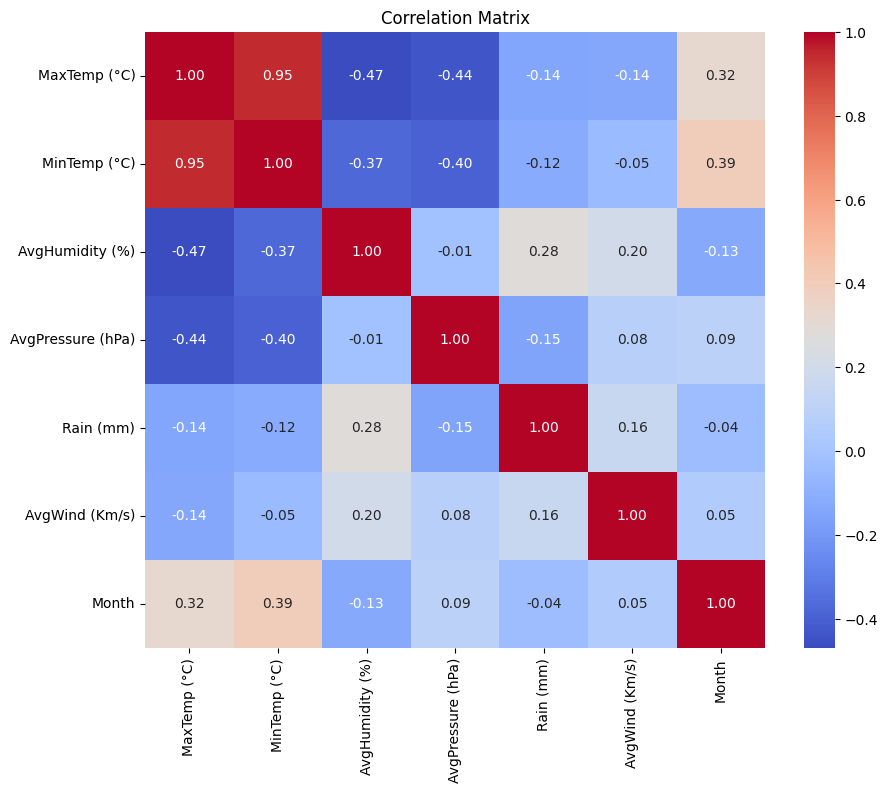

In [34]:
# Calculate the correlation matrix to assess the relationships between numerical variables.
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix as a graph.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Note: The diagonal line of red squares with a value of 1 is a strong indicator that each variable is perfectly correlated with itself. Auto-correlation, while expected, is a valuable indicator and a foundational step for building machine learning models, aiding in the assessment of variable relationships.

# Ready to Build the Machine Learning Model

Now that we have completed a comprehensive correlation analysis, identifying the relationships between weather attributes, and having gained valuable insights from our data, we are well-prepared to proceed with building our machine learning model.

The correlation analysis has provided us with a clear understanding of how different weather variables interact, allowing us to select the most influential features for our model.

Let's embark on this exciting journey into the world of machine learning and unlock the full potential of our weather dataset.


In [45]:
df

,DateTime,Condition,MaxTemp (°C),MinTemp (°C),AvgHumidity (%),AvgPressure (hPa),Rain (mm),AvgWind (Km/s),Month,Light Rain,Moderate Rain,Heavy Rain,Storm Category,Storm Duration,Wind Category
0,2019-09-02,Partly cloudy,27,22,66,1012,0.00,23,9,False,False,False,No Storm,0,Gale
1,2019-09-01,Partly cloudy,27,22,66,1011,0.00,21,9,False,False,False,No Storm,0,Gale
2,2019-08-31,Patchy rain possible,26,22,63,1015,0.50,22,8,True,False,False,Light Rain,2,Gale
3,2019-08-30,Partly cloudy,27,22,64,1016,0.00,20,8,False,False,False,No Storm,0,Near Gale
4,2019-08-29,Partly cloudy,27,23,61,1015,0.00,24,8,False,False,False,No Storm,0,Gale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,2009-01-05,Overcast,5,3,97,1015,4.32,15,1,False,False,True,Heavy Rain,1995,Strong Breeze
3892,2009-01-04,Mist,5,3,94,1014,2.91,9,1,False,True,False,Moderate Rain,1996,Fresh Breeze
3893,2009-01-03,Overcast,5,3,94,1021,0.08,16,1,True,False,False,Light Rain,1997,Strong Breeze
3894,2009-01-02,Overcast,4,1,89,1021,4.48,12,1,False,False,True,Heavy Rain,1998,Strong Breeze


In [47]:
df = df[["Condition","MinTemp (°C)","AvgHumidity (%)","AvgPressure (hPa)"]] #select only the useful columns
df.head()

,Condition,MinTemp (°C),AvgHumidity (%),AvgPressure (hPa)
0,Partly cloudy,22,66,1012
1,Partly cloudy,22,66,1011
2,Patchy rain possible,22,63,1015
3,Partly cloudy,22,64,1016
4,Partly cloudy,23,61,1015


In [48]:
df.shape #print the dimensions of this dataframe

(3896, 4)

In [49]:
df = df.dropna() #remove empty rows

#Convert each category into an interger
for ind in df.index:
  if df["Condition"][ind]=='Sunny':
    df["Condition"][ind] = 0
  elif df["Condition"][ind]=='Partly cloudy':
    df["Condition"][ind] = 1
  elif df["Condition"][ind]=='Cloudy':
    df["Condition"][ind] = 2
  elif df["Condition"][ind]=='Overcast':
    df["Condition"][ind] = 3
  elif df["Condition"][ind]=='Patchy rain possible':
    df["Condition"][ind] = 4
  else:
    df = df.drop([ind]) #we don't consider other classes so we drop it

#Cast this column to int
df["Condition"] = df["Condition"].astype(int)

df.head() #show the 5 first rows of the dataframe

<ipython-input-49-7ecef1bc3a9b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Condition"][ind] = 1
<ipython-input-49-7ecef1bc3a9b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Condition"][ind] = 4
<ipython-input-49-7ecef1bc3a9b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Condition"][ind] = 0
<ipython-input-49-7ecef1bc3a9b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Condition,MinTemp (°C),AvgHumidity (%),AvgPressure (hPa)
0,1,22,66,1012
1,1,22,66,1011
2,4,22,63,1015
3,1,22,64,1016
4,1,23,61,1015


In [50]:
from keras.utils import to_categorical

labels = to_categorical(df.pop('Condition')) #Create classes from the labels

import numpy as np #import numpy library, used for arithmetic

features = np.array(df) #convert our dataframe into ndarray, only array type that neural network takes as input

In [51]:
features

array([[  22,   66, 1012],
       [  22,   66, 1011],
       [  22,   63, 1015],
       ...,
       [   3,   94, 1021],
       [   1,   89, 1021],
       [   2,   90, 1027]])

In [52]:
from sklearn.model_selection import train_test_split


#Split the dataset into training set 85% and test set 15%
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.15,shuffle=True)

In [53]:
labels

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [54]:
import tensorflow as tf

In [55]:
#Parameters :
NB_classes = 5 #number of outputs
NB_neurones = 30 #main number of neurones
NB_features = 3 #number of inputs
activation_func = tf.keras.activations.relu #activation function used

#Densly connected neural network
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func,input_shape=(NB_features,)),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dense(NB_neurones,activation=activation_func),
                             tf.keras.layers.Dropout(0.4), #drop randomly some connection to avoid overfiting
                             #softmax will output an array containing probabilities of each classes
                             #the highest one is the predicted class
                             tf.keras.layers.Dense(NB_classes,activation=tf.keras.activations.softmax)
])

model.compile(optimizer="adam",loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy']) #compile the model

model.summary() #to see the paramter of our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                120       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 30)                930       
                                                                 
 dense_6 (Dense)             (None, 30)                9

In [60]:
model.fit(x=train_features,
          y=train_labels,
          epochs=100,
          validation_data=(test_features,test_labels),
          verbose=1,
          shuffle=True) #Train our model

Epoch 1/100
100/100 [==============================] - 1s 14ms/step - loss: 0.9686 - accuracy: 0.6337 - val_loss: 0.9500 - val_accuracy: 0.6372
Epoch 2/100
100/100 [==============================] - 2s 17ms/step - loss: 0.9648 - accuracy: 0.6347 - val_loss: 0.9353 - val_accuracy: 0.6460
Epoch 3/100
100/100 [==============================] - 1s 14ms/step - loss: 0.9671 - accuracy: 0.6375 - val_loss: 0.9447 - val_accuracy: 0.6372
Epoch 4/100
100/100 [==============================] - 1s 11ms/step - loss: 0.9717 - accuracy: 0.6290 - val_loss: 0.9426 - val_accuracy: 0.6460
Epoch 5/100
100/100 [==============================] - 1s 6ms/step - loss: 0.9657 - accuracy: 0.6347 - val_loss: 0.9379 - val_accuracy: 0.6372
Epoch 6/100
100/100 [==============================] - 1s 6ms/step - loss: 0.9615 - accuracy: 0.6368 - val_loss: 0.9685 - val_accuracy: 0.6549
Epoch 7/100
100/100 [==============================] - 1s 6ms/step - loss: 0.9675 - accuracy: 0.6322 - val_loss: 0.9450 - val_accuracy: 0.

In [62]:
performance=model.evaluate(test_features,test_labels, batch_size=32, verbose=1, steps=None, )[1] * 100
print('Final accuracy : ', round(performance), '%')

18/18 [==============================] - 0s 3ms/step - loss: 0.9282 - accuracy: 0.6531
Final accuracy :  65 %


In [63]:
converter = tf.lite.TFLiteConverter.from_keras_model(model) #create a converter
tflite_model = converter.convert() #convert the model without quantization (for one of the next video)


open("/content/tflite_model.tflite","wb").write(tflite_model) #Create a file containing our tflite model

101768

In [64]:
!apt-get install -qq xxd #installing the tool

In [65]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat /content/tflite_model.tflite | xxd -i >> /content/model.h #create an hexadecimal array containing all our parameters
!echo "};" >> /content/model.h

files.download("/content/model.h") #automaticly download your file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>